In [15]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict,Annotated
from langchain_core.messages import BaseMessage,HumanMessage
from dotenv import load_dotenv
import google.generativeai as genai 
load_dotenv()
model=genai.GenerativeModel('gemini-1.5-flash-latest')
import os
genai.configure(api_key=os.getenv("API_KEY"))
from langgraph.checkpoint.memory import MemorySaver

In [16]:
from langgraph.graph.message import add_messages
class ChatState(TypedDict):
    messages:Annotated[list[BaseMessage], add_messages]

In [17]:
def chat_node(state:ChatState):
    messages=state['messages']
    response=model.generate_content(messages)
    return{'messages':[response]}

In [18]:
checkpointer=MemorySaver()
graph=StateGraph(ChatState)
graph.add_node('chat_node',chat_node)
graph.add_edge(START,'chat_node')
graph.add_edge('chat_node',END)
chatbot=graph.compile(checkpointer=checkpointer)

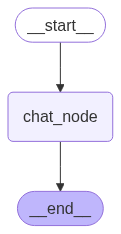

In [7]:
chatbot

In [ ]:
thread_id='1'
while True:
    user_message=input('type here:')
    print('User:', user_message)
    if user_message.strip().lower() in ['exit','quit','bye']:
        break
    config={'configurable':{'thread_id':thread_id}}
    response=model.generate_content({'messsages': [HumanMessage(content=user_message)]},config=config)
    print('AI:',response['messages'][-1].content)
    


In [11]:
initial_state = {
    "messages": [{"role": "user", "content": "What is the capital of India?"}]
}


chatbot.invoke(initial_state)['messages'][-1].content

TypeError: Could not create `Blob`, expected `Blob`, `dict` or an `Image` type(`PIL.Image.Image` or `IPython.display.Image`).
Got a: <class 'langchain_core.messages.human.HumanMessage'>
Value: content='What is the capital of India?' additional_kwargs={} response_metadata={} id='183c3e04-8be0-4b9d-a19f-50b74e80a6c4'